In [45]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from os.path import join

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5}) 
qos_filename, req_filename = None, None

In [46]:
if qos_filename is None:
    dirs = glob.glob("numerical_data/qos_data/*/")
    most_recent_dir = sorted(dirs).pop()
    files = glob.glob(most_recent_dir + "*.csv")
    most_recent_file = sorted(files).pop()
    _qos_filename = most_recent_file
else:
    _qos_filename = qos_filename

print(f"Loading file: {_qos_filename}.")
data = pd.read_csv(_qos_filename)
data.head()

Loading file: numerical_data/qos_data/2021-02-11/19:38:02.880033.csv.


,Unnamed: 0,round,algorithm,QoS,runtime,n_requests,n_served,n_satisfied,n_partial_satisfied
0,0,0,EGP,82.870926,0.445764,100,89,9,59
1,1,1,EGP,83.397384,0.480928,100,90,9,61
2,2,2,EGP,79.321551,0.463043,100,86,9,54
3,3,3,EGP,83.365111,0.515576,100,90,12,60
4,4,4,EGP,82.831262,0.372991,100,90,9,54


In [47]:
if req_filename is None:
    dirs = glob.glob("numerical_data/request_data/*/")
    most_recent_dir = sorted(dirs).pop()
    files = glob.glob(most_recent_dir + "*.csv")
    most_recent_file = sorted(files).pop()
    _req_filename = most_recent_file
else:
    _req_filename = req_filename

print(f"Loading file: {_req_filename}.")
req_data = pd.read_csv(_req_filename)
req_data.head()

Loading file: numerical_data/request_data/2021-02-11/19:38:02.880033.csv.


,Unnamed: 0,round,algorithm,QoA,QoD,QoS,runtime,n_requests,req_id,req_service,req_acc,req_delay,served_acc,served_delay
0,0,0,EGP,0.871814,1.000000,0.935907,0.445764,100,0,49,0.795283,2.934160,0.667097,0.816280
1,1,0,EGP,0.917800,0.974692,0.946246,0.445764,100,1,97,0.849035,0.710940,0.766835,0.964018
2,2,0,EGP,0.937093,1.000000,0.968546,0.445764,100,2,53,0.852186,2.085800,0.789279,1.226128
3,3,0,EGP,1.000000,0.975341,0.987670,0.445764,100,3,5,0.779159,0.830907,0.793476,1.077501
4,4,0,EGP,0.785659,1.000000,0.892830,0.445764,100,4,33,0.874904,6.299922,0.660563,1.075375


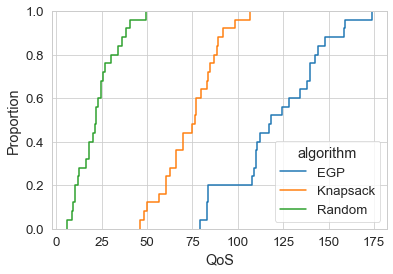

In [48]:
sns.ecdfplot(data=data, x="QoS", hue="algorithm")
# plt.savefig("plots/numerical/QoS-ecdf.pdf")
plt.show()

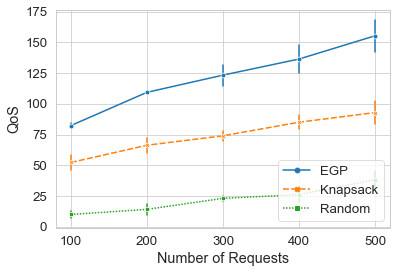

In [49]:
sns.lineplot(data=data, x="n_requests", y="QoS", hue="algorithm", style="algorithm", markers=True, ci="sd", err_style="bars")
plt.legend(loc="lower right")
plt.xlabel("Number of Requests")
# plt.xticks([i*100 for i in range(1, 11)])
# plt.savefig("plots/numerical/QoS-line.pdf")
plt.show()

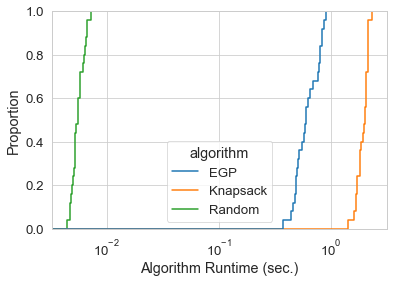

In [50]:
sns.ecdfplot(data=data, x="runtime", hue="algorithm").set(xscale="log")
plt.xlabel("Algorithm Runtime (sec.)")
# plt.savefig(join("plots", "runtime-ecdf.pdf"))
plt.show()

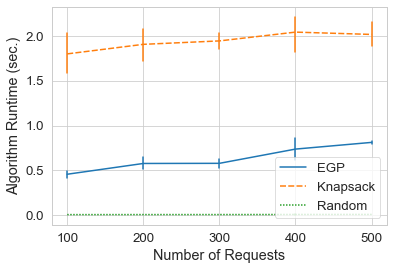

In [51]:
sns.lineplot(data=data, x="n_requests", y="runtime", hue="algorithm", style="algorithm", err_style="bars")#.set(yscale="log")
plt.legend(loc="lower right")
plt.xlabel("Number of Requests")
plt.ylabel("Algorithm Runtime (sec.)")
# plt.savefig("plots/numerical/runtime-line.pdf")
plt.show()

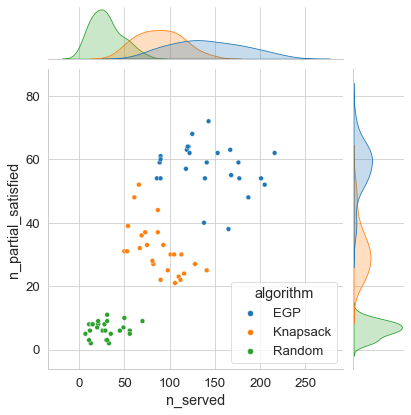

In [52]:
sns.jointplot(data=data, x="n_served", y="n_partial_satisfied", hue="algorithm")
plt.show()

No handles with labels found to put in legend.


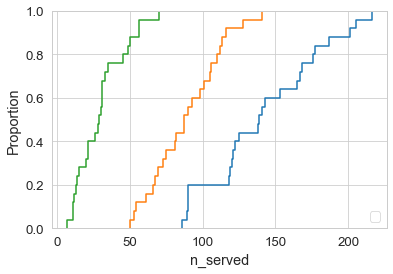

In [53]:
sns.ecdfplot(data=data, x="n_served", hue="algorithm")
plt.legend(loc="lower right")
plt.show()

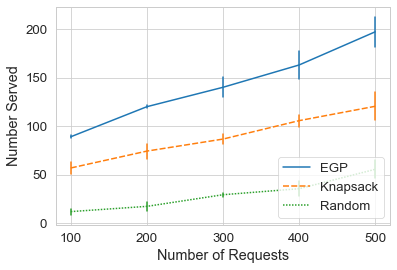

In [54]:
sns.lineplot(data=data, x="n_requests", y="n_served", hue="algorithm", style="algorithm", err_style="bars", ci="sd")
plt.xlabel("Number of Requests")
plt.ylabel("Number Served")
plt.legend(loc="lower right")
plt.show()

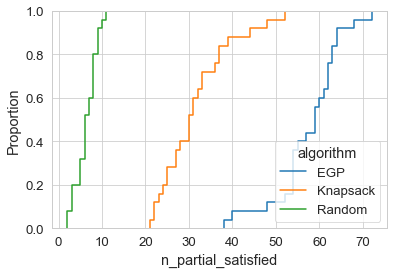

In [55]:
sns.ecdfplot(data=data, x="n_partial_satisfied", hue="algorithm")
plt.show()

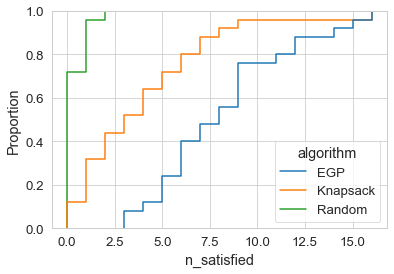

In [56]:
sns.ecdfplot(data=data, x="n_satisfied", hue="algorithm")
plt.show()

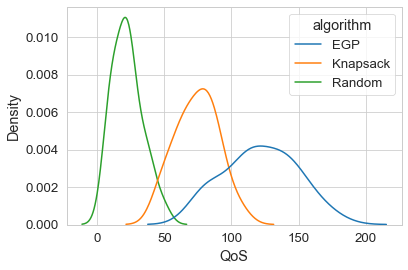

In [57]:
sns.kdeplot(data=data, x="QoS", hue="algorithm")
# plt.legend(loc="upper right")
plt.show()

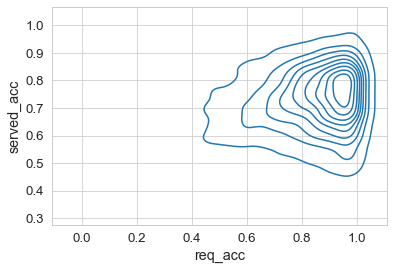

In [58]:
sns.kdeplot(data=req_data, x="req_acc", y="served_acc")
plt.axis("equal")
plt.show()

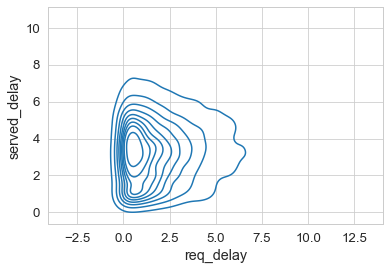

In [59]:
sns.kdeplot(data=req_data, x="req_delay", y="served_delay")
plt.axis("equal")
plt.show()

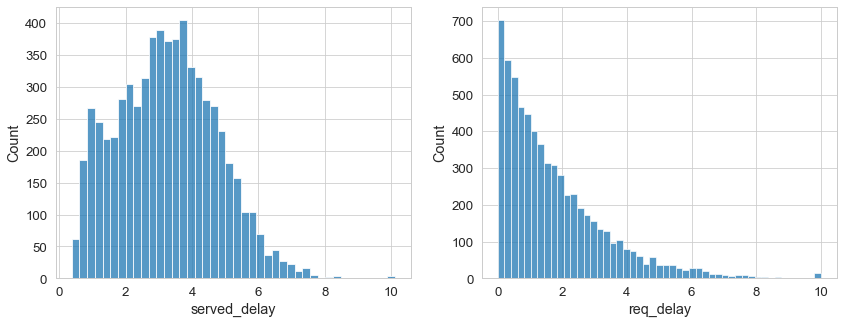

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=req_data, ax=axes[0], x="served_delay")
sns.histplot(data=req_data, ax=axes[1], x="req_delay")
plt.show()

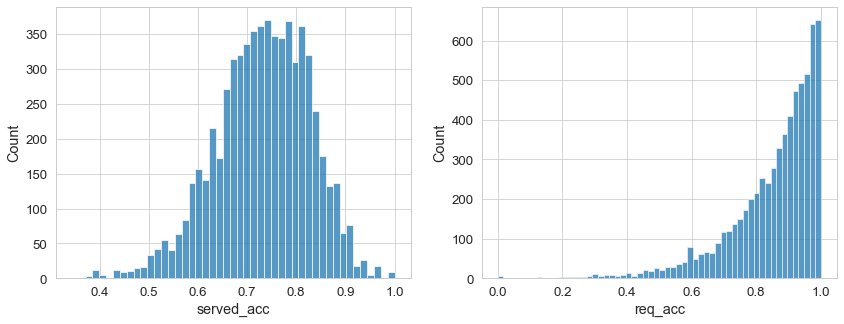

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=req_data, ax=axes[0], x="served_acc")
sns.histplot(data=req_data, ax=axes[1], x="req_acc")
plt.show()

In [62]:
served_data = {
    "proportion": [],
    "n_requests": [],
    "algorithm":  []
}

for n_requests in data["n_requests"].unique():
    for r in data["round"].unique():
        for algorithm in data["algorithm"].unique():
            query = f"n_requests == {n_requests} and round == {r} and algorithm == '{algorithm}'"
            proportion = list(data.query(query)["n_served"])[0] / n_requests
            
            served_data["proportion"].append(proportion)
            served_data["n_requests"].append(n_requests)
            served_data["algorithm"].append(algorithm)

served_data = pd.DataFrame.from_dict(served_data)

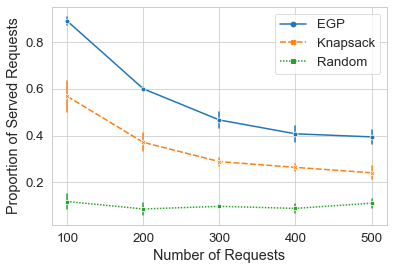

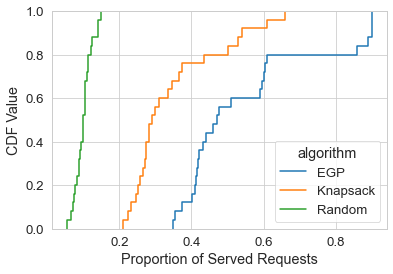

In [63]:
## Lineplot of served data.
sns.lineplot(data=served_data, x="n_requests", y="proportion", hue="algorithm", style="algorithm", markers=True, ci="sd", err_style="bars")
plt.legend(loc="upper right")
plt.ylabel("Proportion of Served Requests")
plt.xlabel("Number of Requests")
# plt.savefig("plots/numerical/n_served-line.pdf")
plt.show()

## ecdfplot of served data.
sns.ecdfplot(data=served_data, x="proportion", hue="algorithm")
plt.xlabel("Proportion of Served Requests")
plt.ylabel("CDF Value")
# plt.savefig(join("plots", "n_served-ecdf.pdf"))
plt.show()

In [64]:
metrics_df = pd.read_csv(join("service_metrics", "metrics_50000.csv"))
metrics_df.head()

,Unnamed: 0,service,model,s,m,acc,cpu,storage_cost
0,0,img-class,AlexNet,0,0,0.56522,1.285950e+08,61100840
1,1,img-class,DenseNet,0,1,0.77138,1.179871e+09,28681000
2,2,img-class,GoogLeNet,0,2,0.69778,3.674906e+08,6624904
3,3,img-class,MobileNet,0,3,0.71878,1.655696e+08,3504872
4,4,img-class,ResNet,0,4,0.69758,2.753515e+08,11689512


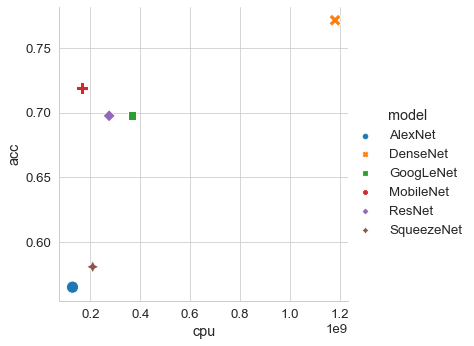

In [65]:
sns.relplot(x="cpu", y="acc", hue="model", style="model", s=150, data=metrics_df)
plt.show()

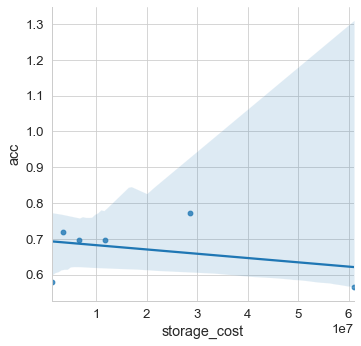

In [66]:
sns.lmplot(x="storage_cost", y="acc", data=metrics_df)
plt.show()